In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
run src/preprocessing.py

In [3]:
numeric_gelman_categorical_significant = pd.merge(numeric_log_gel_sc_out_rem_df, 
                                                  categorical_encoded_features_significant_variance_centered_out_rem,
                                                  left_index=True, right_index=True)

In [4]:
from sklearn.decomposition import PCA
pca_log_std_sc_out_rem = PCA()
pca_log_gel_sc_out_rem = PCA()
pca_num_gel_cat = PCA()

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

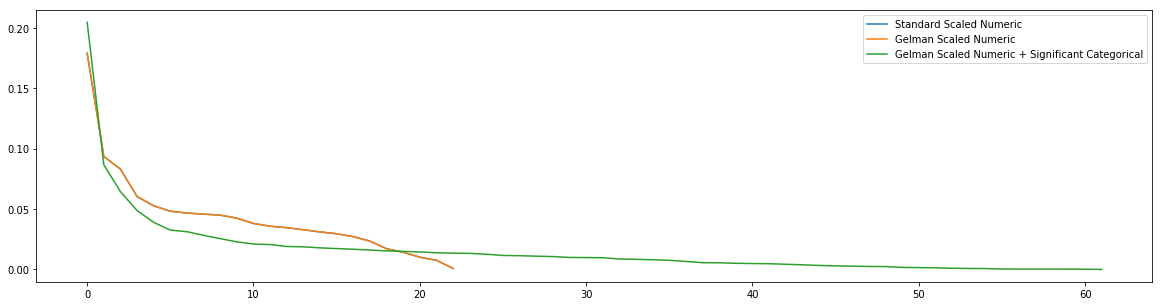

In [5]:
plt.figure(figsize=(20,5))
plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_, label='Standard Scaled Numeric')
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_, label='Gelman Scaled Numeric')
plt.plot(pca_num_gel_cat.explained_variance_ratio_, label='Gelman Scaled Numeric + Significant Categorical')
plt.legend()

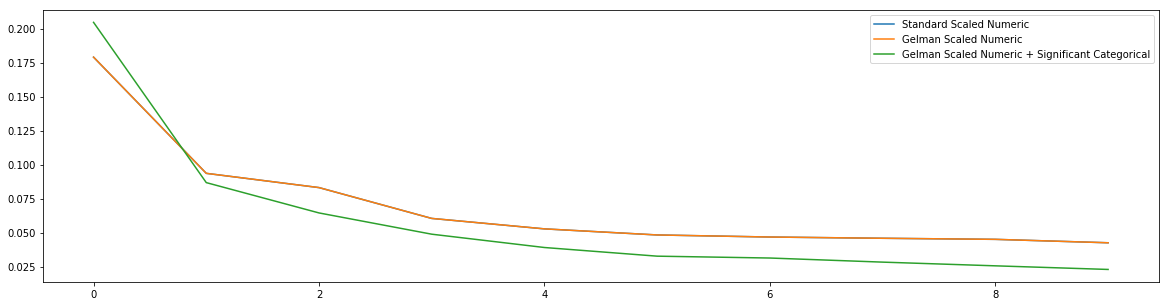

In [10]:
plt.figure(figsize=(20,5))
plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_[:10], label='Standard Scaled Numeric')
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_[:10], label='Gelman Scaled Numeric')
plt.plot(pca_num_gel_cat.explained_variance_ratio_[:10], label='Gelman Scaled Numeric + Significant Categorical')
plt.legend()

In [19]:
pca_log_std_sc_out_rem = PCA(8)
pca_log_gel_sc_out_rem = PCA(8)
pca_num_gel_cat = PCA(8)

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
L_log_std_sc_out_rem = pca_log_std_sc_out_rem.explained_variance_ratio_
L_log_gel_sc_out_rem = pca_log_gel_sc_out_rem.explained_variance_ratio_
L_num_gel_cat = pca_num_gel_cat.explained_variance_ratio_

In [21]:
P_log_std_sc_out_rem = pd.DataFrame(pca_log_std_sc_out_rem.components_, columns=numeric_log_std_sc_out_rem_df.columns)
P_log_gel_sc_out_rem = pd.DataFrame(pca_log_gel_sc_out_rem.components_, columns=numeric_log_gel_sc_out_rem_df.columns)
P_num_gel_cat = pd.DataFrame(pca_num_gel_cat.components_, columns=numeric_gelman_categorical_significant.columns)

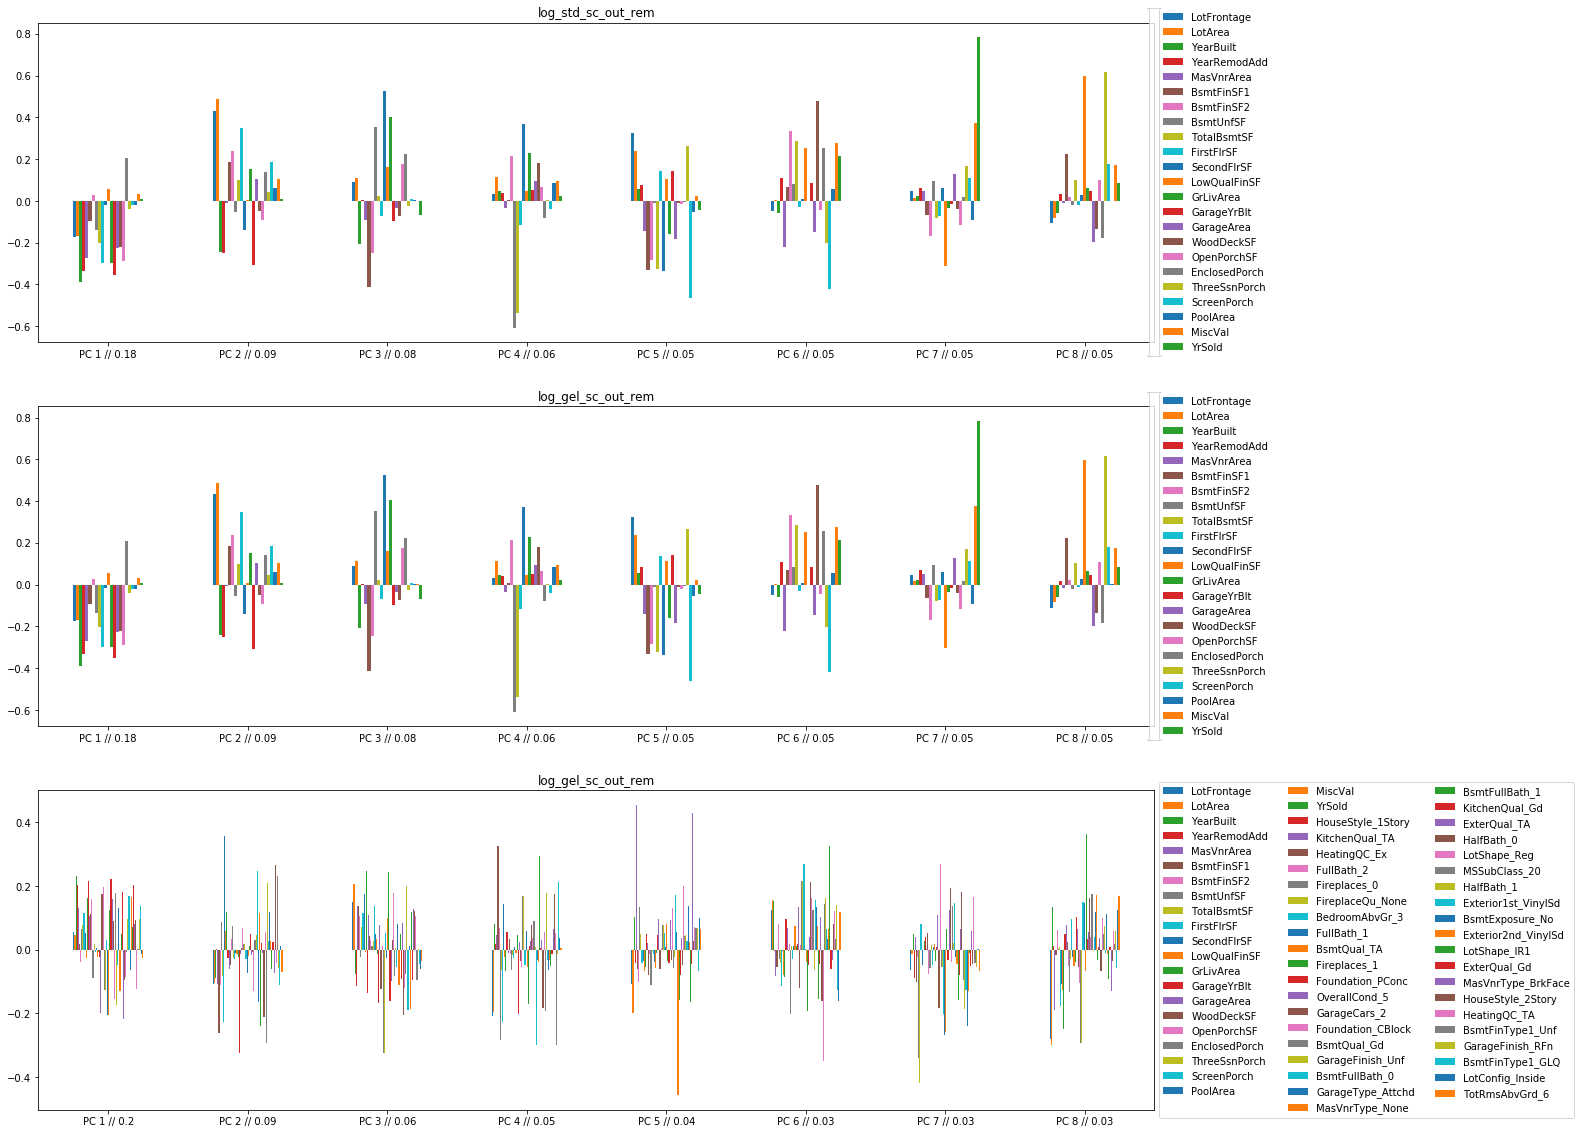

In [22]:
_, ax = plt.subplots(3,1,figsize=(20,20))
P_log_std_sc_out_rem.plot(kind='bar', rot=0, title="log_std_sc_out_rem", ax=ax[0]); 
P_log_gel_sc_out_rem.plot(kind='bar', rot=0, title="log_gel_sc_out_rem", ax=ax[1])
P_num_gel_cat.plot(kind='bar', rot=0, title="log_gel_sc_out_rem", ax=ax[2])

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), mode='expand')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), mode='expand')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

ax[0].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_log_std_sc_out_rem)])
ax[1].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_log_gel_sc_out_rem)])
ax[2].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_num_gel_cat)]);

In [23]:
P_num_gel_cat_abs = P_num_gel_cat.abs()

def top_20_features_by_PC_abs(pc_num):
    PC_0_abs_sorted_index = P_num_gel_cat_abs.T.sort_values(pc_num, ascending=False).index
    PC_0_abs_sorted_index
    return P_num_gel_cat[PC_0_abs_sorted_index].T[pc_num].head(20)

In [24]:
top_20_features_by_PC_abs(0)

YearBuilt              0.231171
Foundation_PConc       0.220654
ExterQual_TA          -0.219245
GarageYrBlt            0.215008
BsmtQual_TA           -0.205763
FullBath_1            -0.203895
ExterQual_Gd           0.203885
YearRemodAdd           0.203381
KitchenQual_TA        -0.200140
FullBath_2             0.197584
KitchenQual_Gd         0.179558
BsmtQual_Gd            0.177149
HeatingQC_Ex           0.176088
GarageFinish_Unf      -0.174513
Exterior1st_VinylSd    0.167228
Exterior2nd_VinylSd    0.165342
GrLivArea              0.163569
OverallCond_5          0.160344
OpenPorchSF            0.159884
Foundation_CBlock     -0.156131
Name: 0, dtype: float64

In [25]:
top_20_features_by_PC_abs(1)

SecondFlrSF          0.356676
HouseStyle_1Story   -0.324946
MSSubClass_20       -0.294230
HouseStyle_2Story    0.266074
BsmtFinSF1          -0.263202
BsmtFullBath_0       0.246362
BsmtFullBath_1      -0.240943
BsmtFinType1_Unf     0.231026
FirstFlrSF          -0.227575
HalfBath_0          -0.211505
HalfBath_1           0.208737
GarageType_Attchd   -0.164669
Foundation_CBlock   -0.130579
BsmtExposure_No      0.119579
GrLivArea            0.118322
MasVnrType_None      0.114200
BsmtFinType1_GLQ    -0.112196
BsmtFinSF2          -0.110475
LotFrontage         -0.108922
MasVnrArea          -0.106459
Name: 1, dtype: float64

In [14]:
top_20_features_by_PC_abs(2)

FireplaceQu_None      -0.323879
Fireplaces_0          -0.323879
GrLivArea              0.247070
Fireplaces_1           0.245104
LotArea                0.205050
HalfBath_0            -0.204557
HalfBath_1             0.198726
Exterior1st_VinylSd   -0.190778
Exterior2nd_VinylSd   -0.187495
Foundation_CBlock      0.178677
SecondFlrSF            0.175719
HouseStyle_1Story     -0.169080
Foundation_PConc      -0.161491
LotFrontage            0.148079
ScreenPorch            0.137980
MasVnrArea             0.135796
BsmtFinSF1             0.135651
GarageYrBlt           -0.135123
MasVnrType_BrkFace     0.127924
HeatingQC_Ex          -0.122449
Name: 2, dtype: float64

In [26]:
numeric_log_std_sc_out_rem_pca_df = pd.DataFrame(pca_log_std_sc_out_rem.transform(numeric_log_std_sc_out_rem_df),
                                                 columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])
numeric_gelman_categorical_significant_pca = pd.DataFrame(pca_num_gel_cat.transform(numeric_gelman_categorical_significant),
                                                 columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])

#### Complete Feature Sets

We are starting to do some fairly complicated feature engineering. It makes sense that we should spend some time thinking about the different data sets we are creating so that we can keep track of what we have.

##### Dataset 1 - Standard Scaled Data Set

One data set is the standard scaled data set. For this data set, there is no need to separate the encoded categorical features. These two dataframes comprise a complete data set

- Log Transformed, Standard Scaled Numerical Features (`numeric_log_std_sc_out_rem_df`)
- Complete One-hot Encoded Categorical Features (`categorical_encoded_df`)

##### Dataset 2 - Standard Scaled, PCA Augmented Data Set

One data set is the standard scaled data set, augmented with transformed data from a PCA Run on the numeric features. We know that there is significant redundancy in this data set. These three dataframes comprise a complete data set

- Log Transformed, Standard Scaled Numerical Features (`numeric_log_std_sc_out_rem_df`)
- Complete One-hot Encoded Categorical Features (`categorical_encoded_df`)
- PCA-transformed Numeric Data (`numeric_log_std_sc_out_rem_pca_df`)

##### Dataset 3 - Gelman Scaled Data Set

Another data set is the Gelman scaled data set. For this data set, we have separated the encoded categorical features based on a threshold for variance. These three dataframes comprise a complete data set

- Log Transformed, Gelman Scaled Numerical Features (`numeric_log_gel_sc_df`)
- One-hot Encoded Categorical Features with Significant Variance, Centered (`categorical_encoded_features_significant_variance_centered`)
- One-hot Encoded Categorical Features with Insignificant Variance (`categorical_encoded_features_insignificant_variance`)

##### Dataset 4 - Gelman Scaled, PCA Augmented  Data Set

Our final data set is the Gelman scaled data set, augmented with transformed data from a PCA Run on the numeric features and categorical features with significant variance. This Data sets also has significant redundancy. For this data set, we have separated the encoded categorical features based on a threshold for variance. These three dataframes comprise a complete data set

- Log Transformed, Gelman Scaled Numerical Features (`numeric_log_gel_sc_df`)
- One-hot Encoded Categorical Features with Significant Variance, Centered (`categorical_encoded_features_significant_variance_centered`)
- One-hot Encoded Categorical Features with Insignificant Variance (`categorical_encoded_features_insignificant_variance`)
- PCA-transformed Numeric and Significant Categorical (`numeric_gelman_categorical_significant_pca`)




In [27]:
dataset_1 = pd.merge(categorical_encoded_df, numeric_log_std_sc_out_rem_df, left_index=True, right_index=True)
dataset_2 = pd.merge(dataset_1, numeric_log_std_sc_out_rem_pca_df, left_index=True, right_index=True)
dataset_3 = pd.merge(numeric_log_gel_sc_out_rem_df, categorical_encoded_features_significant_variance_centered, 
                                             left_index=True, right_index=True)
dataset_3 = pd.merge(dataset_3, categorical_encoded_features_insignificant_variance, left_index=True, right_index=True)
dataset_4 = pd.merge(dataset_3, numeric_gelman_categorical_significant_pca, left_index=True, right_index=True)

In [28]:
(dataset_1.isnull().sum().sum(),
 dataset_2.isnull().sum().sum(),
 dataset_3.isnull().sum().sum(),
 dataset_4.isnull().sum().sum())

(0, 0, 0, 0)

In [29]:
(dataset_1.shape,
 dataset_2.shape,
 dataset_3.shape,
 dataset_4.shape)

((1444, 382), (1427, 390), (1444, 382), (1427, 390))